In [6]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline



In [58]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -8*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Q(basis) : 
    N = basis.shape[0]
    Electron_matrix = np.zeros((N,N,N,N))
    Qt = np.zeros((N,N,N,N)) 
    for p in range(N) :
        for q in range(p+1) :
            for r in range(p+1) :
                if p != q :
                    for s in range(r+1) :
                        Electron_matrix[p,r,q,s] = 2*np.pi**(5/2)/(basis[p] + basis[q])/(basis[r] + basis[s])/(basis[p] + basis[q] + basis[r] + basis[s])**(1/2)
                        Electron_matrix[p,s,q,r] = Electron_matrix[p,r,q,s]
                        Electron_matrix[q,r,p,s] = Electron_matrix[p,r,q,s]
                        Electron_matrix[q,s,p,r] = Electron_matrix[p,r,q,s]
                        Electron_matrix[r,p,s,q] = Electron_matrix[p,r,q,s]
                        Electron_matrix[r,q,s,p] = Electron_matrix[p,r,q,s]
                        Electron_matrix[s,p,r,q] = Electron_matrix[p,r,q,s]
                        Electron_matrix[s,q,r,p] = Electron_matrix[p,r,q,s]
                else :
                    for s in range(q+1) :
                        Electron_matrix[p,r,q,s] = 2*np.pi**(5/2)/(basis[p] + basis[q])/(basis[r] + basis[s])/(basis[p] + basis[q] + basis[r] + basis[s])**(1/2)
                        Electron_matrix[p,s,q,r] = Electron_matrix[p,r,q,s]
                        Electron_matrix[q,r,p,s] = Electron_matrix[p,r,q,s]
                        Electron_matrix[q,s,p,r] = Electron_matrix[p,r,q,s]
                        Electron_matrix[r,p,s,q] = Electron_matrix[p,r,q,s]
                        Electron_matrix[r,q,s,p] = Electron_matrix[p,r,q,s]
                        Electron_matrix[s,p,r,q] = Electron_matrix[p,r,q,s]
                        Electron_matrix[s,q,r,p] = Electron_matrix[p,r,q,s]

    for p in range(N) :
        for q in range(N) :
            for r in range(N) : 
                for s in range(N) :
                    Qt[p,r,q,s] = 2*Electron_matrix[p,r,q,s] - Electron_matrix[p,r,s,q]
    return Qt

def normalize(C,S) :
    I = 0
    N = np.shape(C)[0]
    for r in range(N) :
        for s in range(N) : 
            I = I + S[r,s]*C[r]*C[s]
    C = C/I
    return C

In [54]:
def Be(a0,a1,a2,a3,C1,C2) :
    basis = np.array([a0, a1, a2, a3])
    
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)
    Q_tensor = Q(basis)
    Q_matrix = np.zeros((4,4)) 

    C1 = normalize(C1,S_matrix)
    C2 = normalize(C2,S_matrix)
    density_matrix = np.zeros((4,4))

    for p in range(4) :
        for q in range(4) :
            density_matrix[p,q] = 2*(C1[p]*C1[q] + C2[p]*C2[q])
    for r in range(4) : 
        for s in range(4) : 
            Q_matrix = Q_matrix + 1/2*density_matrix[r,s]*(Q_tensor[:,r,:,s] )
    
    eigenenergy, eigenvector= eigh((T_matrix + A_matrix + Q_matrix), S_matrix)
    eigenenergy1 = eigenenergy[0]
    eigenenergy2 = eigenenergy[1]
    eigenvector1 = eigenvector[:,0]
    eigenvector2 = eigenvector[:,1]
    
    total_energy = 0 
    for p in range(4) :
        for q in range(4) :
            total_energy = total_energy  + (A_matrix[p,q]+T_matrix[p,q])*density_matrix[p,q]
            for r in range(4) :
                for s in range(4) :
                    total_energy = total_energy + 1/4*Q_tensor[p,r,q,s]*density_matrix[p,q]*density_matrix[r,s]
                    
    return np.array([eigenvector1,eigenvector2]), total_energy


In [84]:
def SCF(a0,a1,a2,a3) : 
    n = 10
    C1 = np.array([1,1,1,1])
    C2 = np.array([1,1,1,1])
    for ele in range(n) :
        total_energy = Helium(a0,a1,a2,a3,C1,C2)[1]
        C1 = Helium(a0,a1,a2,a3,C1,C2)[0][0,:]
        C2 = Helium(a0,a1,a2,a3,C1,C2)[0][1,:]
        #print(total_energy)
    return total_energy

SCF(0.10381982468933668, 1.8553576416336492, 8.07809974596733, 52.674618842514306)


-14.459519993661544

In [82]:
def MGD(a0,a1,a2,a3,step_size,limit) :
    gradient = np.array([[SCF(a0+0.00001,a1,a2,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1+0.00001,a2,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1,a2+0.00001,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1,a2,a3+0.00001) - SCF(a0,a1,a2,a3)]])/0.00001
    v = np.zeros((4,1))
    i = 0
    data = np.array([[i],[SCF(a0,a1,a2,a3)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.000001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v[0,0]
        a1 = a1 - v[1,0]
        a2 = a2 - v[2,0]
        a3 = a3 - v[3,0]
        i += 1
        print([a0,a1,a2,a3])
        #gradient = np.array([[SCF(a0+0.00001,a1,a2,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1+0.00001,a2,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1,a2+0.00001,a3) - SCF(a0,a1,a2,a3)], [SCF(a0,a1,a2,a3+0.00001) - SCF(a0,a1,a2,a3)]])/0.000001
        gradient = np.array([[0], [0], [0], [SCF(a0,a1,a2,a3+0.00001) - SCF(a0,a1,a2,a3)]])/0.000001
        data = np.append(data,[[i],[SCF(a0,a1,a2,a3)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]], axis = 1)
        
    return data

[0.10402563168744702, 1.8532106828273565, 8.079423916393973, 52.491410638356314]
[0.10421085798574634, 1.851278419901693, 8.08061566977795, 52.49135319211122]
[0.10437756165421572, 1.8495393832685958, 8.08168824782353, 52.491260264445835]
[0.10452759495583816, 1.8479742502988084, 8.082653568064552, 52.491144879833016]
[0.10466262492729836, 1.8465656306259997, 8.083522356281472, 52.49101782007267]
[0.10478415190161254, 1.8452978729204719, 8.0843042656767, 52.49088794483757]
[0.1048935261784953, 1.8441568909854968, 8.085007984132405, 52.49076245938124]
[0.10499196302768979, 1.8431300072440193, 8.08564133074254, 52.49064715796195]
[0.10508055619196482, 1.8422058118766895, 8.08621134269166, 52.49054663297672]
[0.10516029003981235, 1.8413740360460926, 8.08672435344587, 52.49046445909625]
[0.10523205050287512, 1.8406254377985556, 8.087186063124658, 52.490403344420336]
[0.10529663491963162, 1.839951699375772, 8.087601601835567, 52.49036526829397]
[0.10535476089471248, 1.839345334795267, 8.087

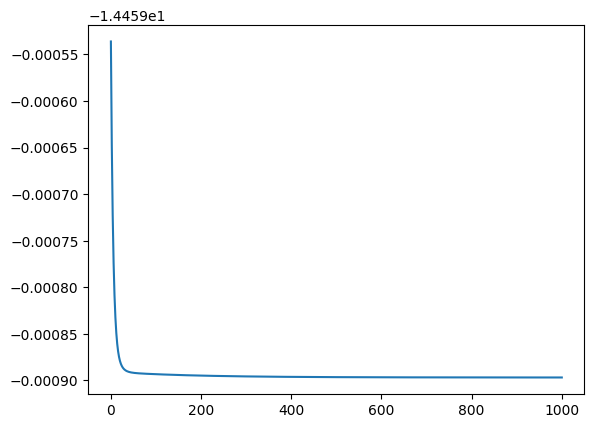

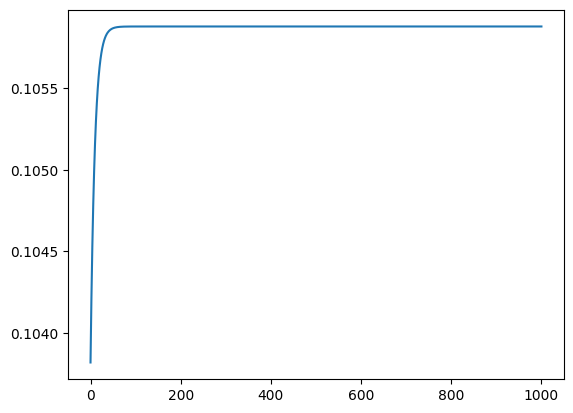

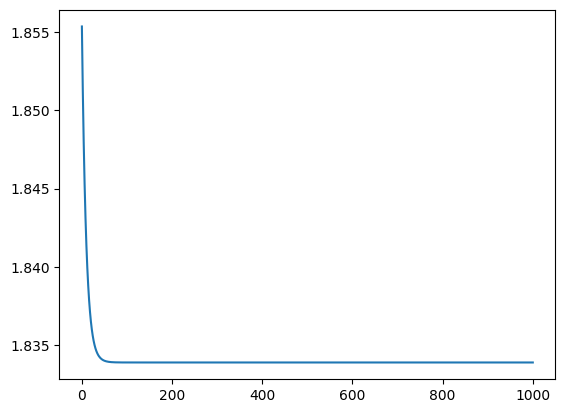

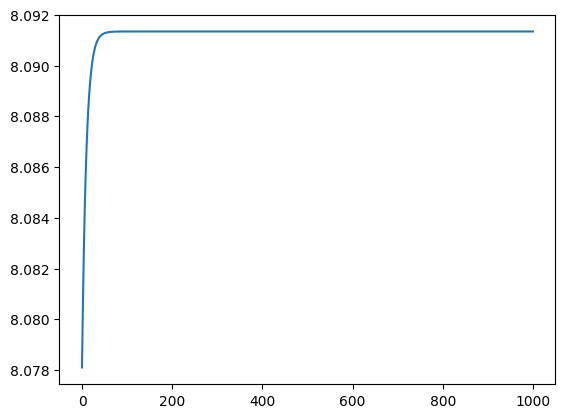

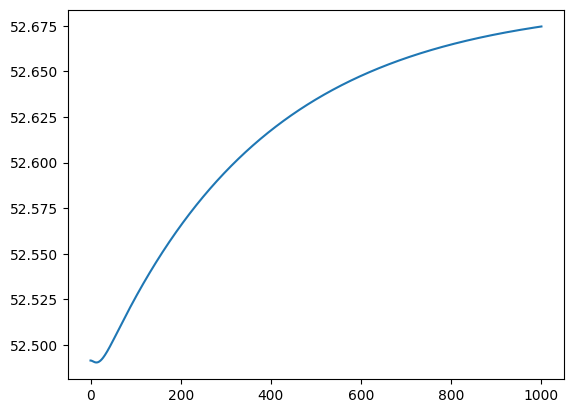

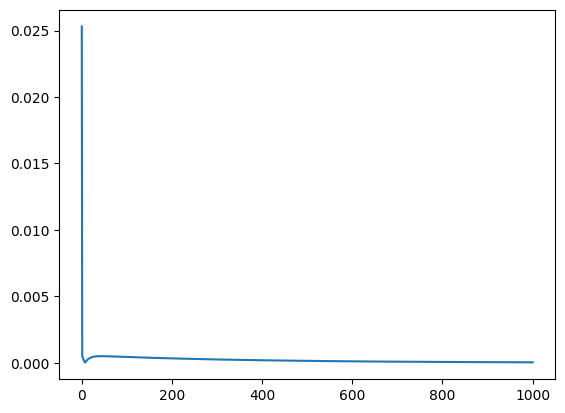

In [83]:
test = MGD(0.10381982468933668, 1.8553576416336492,8.07809974596733,52.49141697868902,0.1,1000)
for ele in range(1,7) :
    plt.figure(ele)
    plt.plot(test[0,:],test[ele,:])
print(test[:,-1])

In [36]:
basis = np.array([0.62149213, 17.8610064, 29.14675389, 39.52738094])
S(basis)

array([[4.01815204, 0.07007834, 0.03428427, 0.02188844],
       [0.07007834, 0.0260808 , 0.01727708, 0.01280822],
       [0.03428427, 0.01727708, 0.01251107, 0.00978442],
       [0.02188844, 0.01280822, 0.00978442, 0.00792196]])